# agglomerative 

In [2]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [ ]:
# Dendrogram's 

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [33]:
# linkage metrics craete karne k liye function banare hai
def plot_dendrogram(model , **kwargs):
    # linkage matrix ---> we will be plotting the dendogram 
    # count of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1 # leaf mode
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_,model.distances_,counts]
    ).astype(float)
    dendrogram(linkage_matrix,**kwargs)

In [34]:
iris= load_iris()

In [35]:
X = iris.data

In [36]:
model = AgglomerativeClustering(distance_threshold = 0,n_clusters = None)

In [37]:
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

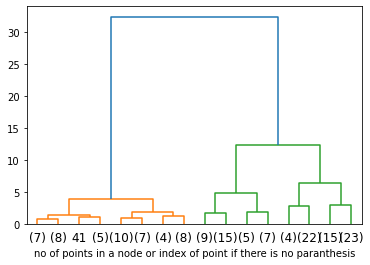

In [41]:
plot_dendrogram(model,truncate_mode = 'level' ,p=3)
plt.xlabel('no of points in a node or index of point if there is no paranthesis')
plt.show()

------------------------------------------------------------------------

# Hierarchical Clustering Mall Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = dataset.iloc[:,[3,4]].values

In [4]:
X.shape

(200, 2)

In [5]:
# model 
from sklearn.cluster import AgglomerativeClustering 

In [6]:
# AgglomerativeClustering hai isme hume batana padega ki kitne numbers of clusters hum chahte hai banana 
# ye to hume malum nahi hai to jab ye hume nahi malum to isse pehle hum dendogram banayege 
# aur dendogram bana kar k pehle hum pata karenge ki AgglomerativeClustering
# approach me humm kitne clusters pass kare

In [7]:
import scipy.cluster.hierarchy as sch# iski help se dendogram create krenge

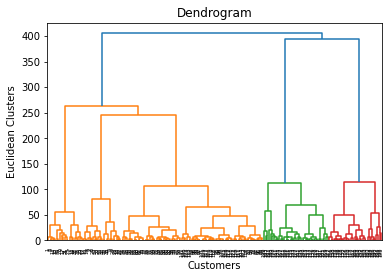

In [8]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Clusters')
plt.show()

In [9]:
hc = AgglomerativeClustering(n_clusters = 5)


In [10]:
y_clusters=hc.fit_predict(X)
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

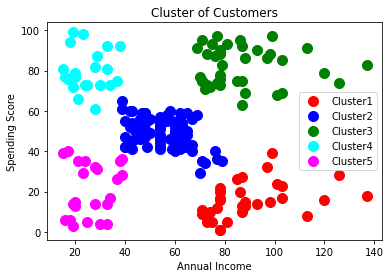

In [11]:
# visualize 
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=100,c='red',label = 'Cluster1')
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=100,c='blue',label = 'Cluster2')
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=100,c='green',label = 'Cluster3')
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=100,c='cyan',label = 'Cluster4')
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=100,c='magenta',label = 'Cluster5')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [12]:
dataset['label'] = y_clusters
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
